In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
(X_train , y_train) , (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [4]:
X_train.shape , y_train.shape

((50000, 32, 32, 3), (50000, 1))

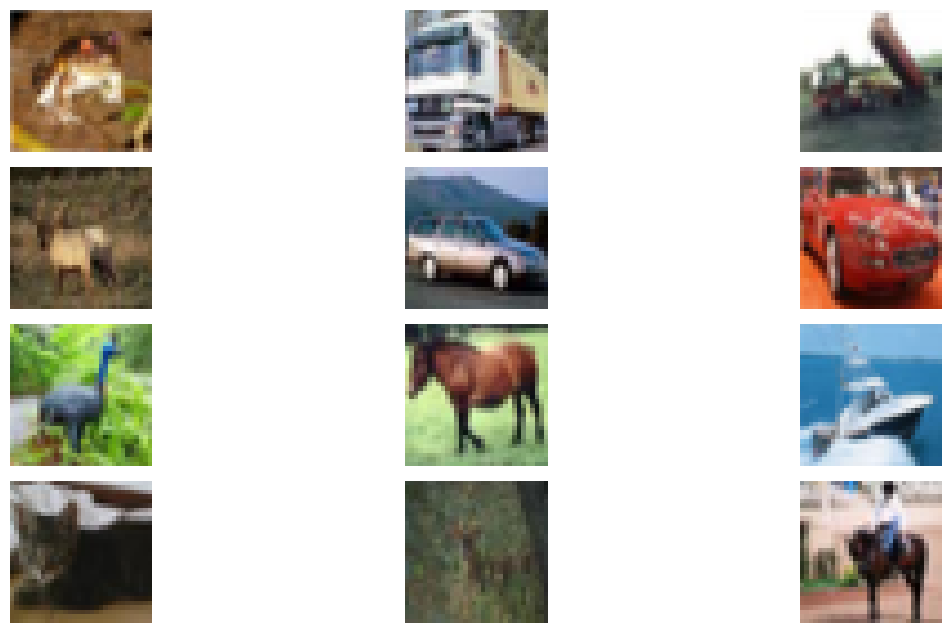

In [5]:
plt.figure(figsize=(12,8))
for idx, val in enumerate(X_train[:12], 1):
    plt.subplot(5, 3, idx)
    plt.imshow(val)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [6]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [7]:
y_train # One Hot Encoded #

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [8]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [9]:
y_train_encoded = keras.utils.to_categorical(y_train, num_classes=10)

In [10]:
y_train_encoded[0] , y_train[0]

(array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32),
 array([6], dtype=uint8))

In [11]:
y_test_encoded = keras.utils.to_categorical(y_test, num_classes=10)

In [12]:
y_test_encoded[0] , y_test[0]

(array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([3], dtype=uint8))

In [13]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        # keras.layers.Dense(3000, activation='relu'),
        # keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

In [14]:
model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

In [19]:
with tf.device('/GPU:0'):
    model.fit(X_train_scaled,y_train_encoded,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7266 - accuracy: 0.4040
Epoch 2/5
1502/1563 [===========================>..] - ETA: 0s - loss: 1.7254 - accuracy: 0.4021

KeyboardInterrupt: 